<a href="https://colab.research.google.com/github/baykaa/python-data-science/blob/main/World_Bank_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# PRESENTATION START
# Retrieving World Bank Data from Nasdaq library
!pip3 install nasdaq-data-link
import nasdaqdatalink as Nasdaqdatalink

# API key
Nasdaqdatalink.ApiConfig.api_key = 'vTMYn1uLbkqRRKJ6Zzh2'

# Getting WB Datas table with country_code
Nasdaqdatalink.get_table('WB/DATA',series_id='VC.PKP.TOTL.UN', country_code='XKX,WLD,UMC')

,series_id,country_code,country_name,year,value
None,,,,,
0,VC.PKP.TOTL.UN,XKX,Kosovo,2017,357.0
1,VC.PKP.TOTL.UN,XKX,Kosovo,2016,462.0
2,VC.PKP.TOTL.UN,XKX,Kosovo,2015,640.0
3,VC.PKP.TOTL.UN,XKX,Kosovo,2014,736.0
4,VC.PKP.TOTL.UN,XKX,Kosovo,2013,756.0
5,VC.PKP.TOTL.UN,XKX,Kosovo,2012,928.0
6,VC.PKP.TOTL.UN,XKX,Kosovo,2011,1024.0
7,VC.PKP.TOTL.UN,XKX,Kosovo,2010,1088.0
8,VC.PKP.TOTL.UN,XKX,Kosovo,2009,1207.0


In [ ]:
# WB Metadata - Names and descriptions of all indicators
metadata = Nasdaqdatalink.get_table('WB/METADATA')

,series_id,name,description
None,,,
0,VC.PKP.TOTL.UN,"Presence of peace keepers (number of troops, p...",Presence of peacebuilders and peacekeepers are...
1,VC.IHR.PSRC.P5,"Intentional homicides (per 100,000 people)",Intentional homicides are estimates of unlawfu...
2,VC.IHR.PSRC.MA.P5,"Intentional homicides, male (per 100,000 male)","Intentional homicides, male are estimates of u..."
3,VC.IHR.PSRC.FE.P5,"Intentional homicides, female (per 100,000 fem...","Intentional homicides, female are estimates of..."
4,VC.IDP.TOCV,"Internally displaced persons, total displaced ...",Internally displaced persons are defined accor...
...,...,...,...
1479,AG.LND.AGRI.ZS,Agricultural land (% of land area),Agricultural land refers to the share of land ...
1480,AG.LND.AGRI.K2,Agricultural land (sq. km),Agricultural land refers to the share of land ...
1481,AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare ...,Fertilizer consumption measures the quantity o...


In [ ]:
# METADATAS - Relevant parameters for our data
# SE.PRE.ENRR - School enrollment, preprimary (% gross)
# SE.PRM.NENR - School enrollment, primary (% net)
# SE.PRM.ENRR - School enrollment, primary (% gross)
# SE.PRM.PRIV.ZS - School enrollment, primary, private
# SE.PRM.PRIV.ZS - School enrollment, primary, private (% of total primary)
# SE.SEC.NENR - School enrollment, secondary (% net)
# SE.SEC.PRIV.ZS - School enrollment, secondary, private (% of total secondary)
# SE.ENR.PRSC.FM.ZS - School enrollment, primary and secondary (gross), gender parity index (GPI)
# SE.TER.ENRR - School enrollment, tertiary (% gross)
# SE.ENR.TERT.FM.ZS - School enrollment, tertiary (gross), gender parity index (GPI)

# NY.GDP.PCAP.PP.CD - GDP per capita, PPP (current international $)
# SL.GDP.PCAP.EM.KD - GDP per person employed (constant 2021 PPP $)
# NY.GDP.MKTP.PP.KD - GDP, PPP (constant 2021 international $)
# NY.GDP.MKTP.CN - GDP (current LCU)
# NY.GDP.PCAP.KD.ZG- GDP per capita growth (annual %)

In [ ]:
# X = SE.PRM.ENRR
# Y = NY.GDP.PCAP.KD.ZG
Nasdaqdatalink.get_table('WB/DATA',series_id=['NY.GDP.PCAP.KD.ZG'], country_code='WLD')
import pandas as pd
import matplotlib.pyplot as plt

**PRIMARY SCHOOL ENROLLMENT & GDP**

In [ ]:
# ANALYZING ON PRIMARY SCHOOL ENROLLMENT & DATA CLEANING
enrollment_data_primary = Nasdaqdatalink.get_table('WB/DATA', series_id=['SE.PRM.NENR'], country_code='WLD')
gdp_data = Nasdaqdatalink.get_table('WB/DATA', series_id=['NY.GDP.PCAP.KD.ZG'], country_code='WLD')
# Clean the data (remove NaN values)
enrollment_data_primary = enrollment_data_primary.dropna()
gdp_data = gdp_data.dropna()

# Merge the two datasets on 'country_code' and 'year'
merged_data_primary = pd.merge(enrollment_data_primary, gdp_data, on=['country_code', 'year'])
merged_data_primary

,series_id_x,country_code,country_name_x,year,value_x,series_id_y,country_name_y,value_y
0,SE.PRM.NENR,WLD,World,2018,89.41240,NY.GDP.PCAP.KD.ZG,World,2.153227
1,SE.PRM.NENR,WLD,World,2017,89.26194,NY.GDP.PCAP.KD.ZG,World,2.283867
2,SE.PRM.NENR,WLD,World,2016,89.41678,NY.GDP.PCAP.KD.ZG,World,1.630446
3,SE.PRM.NENR,WLD,World,2015,89.16969,NY.GDP.PCAP.KD.ZG,World,1.915147
4,SE.PRM.NENR,WLD,World,2014,89.22588,NY.GDP.PCAP.KD.ZG,World,1.885841
5,SE.PRM.NENR,WLD,World,2013,88.99782,NY.GDP.PCAP.KD.ZG,World,1.615675
6,SE.PRM.NENR,WLD,World,2012,89.00668,NY.GDP.PCAP.KD.ZG,World,1.451509
7,SE.PRM.NENR,WLD,World,2011,88.65391,NY.GDP.PCAP.KD.ZG,World,2.095320
8,SE.PRM.NENR,WLD,World,2010,88.63339,NY.GDP.PCAP.KD.ZG,World,3.265483
9,SE.PRM.NENR,WLD,World,2009,88.62895,NY.GDP.PCAP.KD.ZG,World,-2.561856


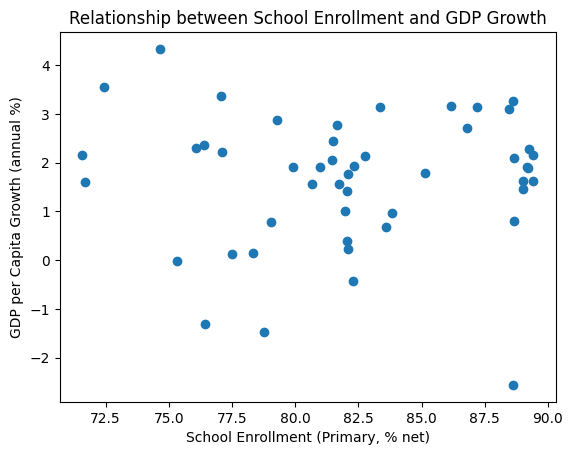

In [ ]:
# Exploratory Data Analysis (EDA):
# Create a scatter plot for Primary School Enrollment vs. GDP Growth
plt.scatter(merged_data_primary['value_x'], merged_data_primary['value_y'])
plt.xlabel('School Enrollment (Primary, % net)')
plt.ylabel('GDP per Capita Growth (annual %)')
plt.title('Relationship between School Enrollment and GDP Growth')
plt.show()

The scatter plot shows some relationship between **primary** school enrollment and GDP per capita growth, though it seems somewhat dispersed, meaning the relationship might not be very strong.

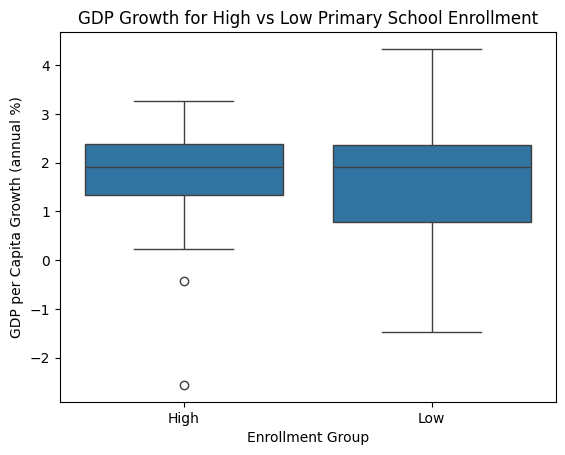

In [ ]:
# Box plot for GDP growth vs. Primary school enrollment group
# sns.boxplot(x='country_name_x', y='value_y', hue='value_x', data=merged_data_primary)
# plt.title('GDP Growth for High vs Low Primary School Enrollment')
# plt.xlabel('World')
# plt.ylabel('GDP per Capita Growth (annual %)')
# plt.show()

# Create a new column to categorize high and low school enrollment based on the median
merged_data_primary['Enrollment_Group'] = merged_data_primary['value_x'].apply(lambda x: 'High' if x > merged_data_primary['value_x'].median() else 'Low')

# Create a box plot for GDP growth by enrollment group
sns.boxplot(x='Enrollment_Group', y='value_y', data=merged_data_primary)
plt.title('GDP Growth for High vs Low Primary School Enrollment')
plt.xlabel('Enrollment Group')
plt.ylabel('GDP per Capita Growth (annual %)')
plt.show()

The box plot suggests that primary school enrollment rates alone do not strongly differentiate GDP growth across countries. Both high and low enrollment countries can achieve similar levels of GDP growth, with the low enrollment group showing more variability.

This may indicate that other factors (such as economic policies, infrastructure, or health systems) play a significant role in determining GDP growth, beyond just school enrollment rates.

In [ ]:
# Hypothesis Testing:
from scipy.stats import ttest_ind

# Divide countries into two groups based on median enrollment rate
high_enrollment = merged_data_primary[merged_data_primary['value_x'] > merged_data_primary['value_x'].median()]
low_enrollment = merged_data_primary[merged_data_primary['value_x'] <= merged_data_primary['value_x'].median()]

# Perform t-test
t_stat, p_value = ttest_ind(high_enrollment['value_y'], low_enrollment['value_y'])

print(f"Primary School Enrollment T-statistic: {t_stat}")
print(f"Primary School Enrollment P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is evidence to suggest that countries with higher primary school enrollment have higher GDP growth.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest that higher primary school enrollment leads to higher GDP growth.")

Primary School Enrollment T-statistic: 0.25945652774451666
Primary School Enrollment P-value: 0.7964161431173293
Fail to reject the null hypothesis.
There is not enough evidence to suggest that higher primary school enrollment leads to higher GDP growth.


Conclusion - 1:
The statistical test shows that the difference in GDP growth between high and low **primary** school enrollment countries is not significant.

While education is important, this result suggests that school enrollment alone may not be a strong predictor of GDP growth. Other economic, social, or political factors could be playing a larger role, and it might be worth exploring those variables further.



---



**SECONDARY SCHOOL ENROLLMENT & GDP**

In [ ]:
# ANALYZING ON SECONDARY SCHOOL ENROLLMENT & DATA CLEANING
enrollment_data_secondary = Nasdaqdatalink.get_table('WB/DATA', series_id=['SE.SEC.NENR'], country_code='WLD')
enrollment_data_secondary = enrollment_data_secondary.dropna()
gdp_data = gdp_data.dropna()

# Merge the two datasets on 'country_code' and 'year'
merged_data_secondary = pd.merge(enrollment_data_secondary, gdp_data, on=['country_code', 'year'])
merged_data_secondary

,series_id_x,country_code,country_name_x,year,value_x,series_id_y,country_name_y,value_y
0,SE.SEC.NENR,WLD,World,2018,66.27183,NY.GDP.PCAP.KD.ZG,World,2.153227
1,SE.SEC.NENR,WLD,World,2017,66.19644,NY.GDP.PCAP.KD.ZG,World,2.283867
2,SE.SEC.NENR,WLD,World,2016,65.82859,NY.GDP.PCAP.KD.ZG,World,1.630446
3,SE.SEC.NENR,WLD,World,2015,65.71337,NY.GDP.PCAP.KD.ZG,World,1.915147
4,SE.SEC.NENR,WLD,World,2014,65.64805,NY.GDP.PCAP.KD.ZG,World,1.885841
5,SE.SEC.NENR,WLD,World,2013,64.89960,NY.GDP.PCAP.KD.ZG,World,1.615675
6,SE.SEC.NENR,WLD,World,2012,63.79482,NY.GDP.PCAP.KD.ZG,World,1.451509
7,SE.SEC.NENR,WLD,World,2011,63.53369,NY.GDP.PCAP.KD.ZG,World,2.095320
8,SE.SEC.NENR,WLD,World,2010,62.54485,NY.GDP.PCAP.KD.ZG,World,3.265483
9,SE.SEC.NENR,WLD,World,2009,61.30970,NY.GDP.PCAP.KD.ZG,World,-2.561856


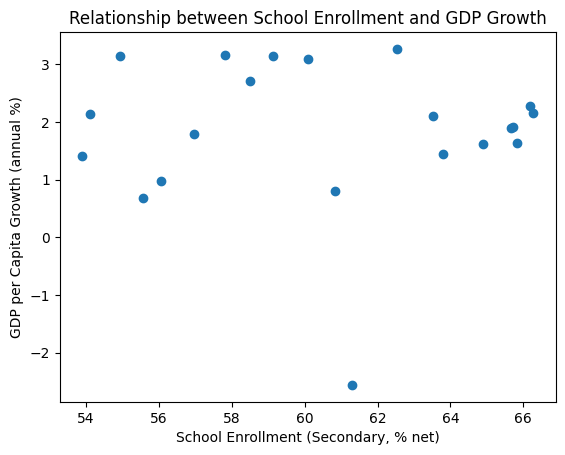

In [ ]:
plt.scatter(merged_data_secondary['value_x'], merged_data_secondary['value_y'])
plt.xlabel('School Enrollment (Secondary, % net)')
plt.ylabel('GDP per Capita Growth (annual %)')
plt.title('Relationship between School Enrollment and GDP Growth')
plt.show()

Indicates a weak or unclear relationship between the two variables.

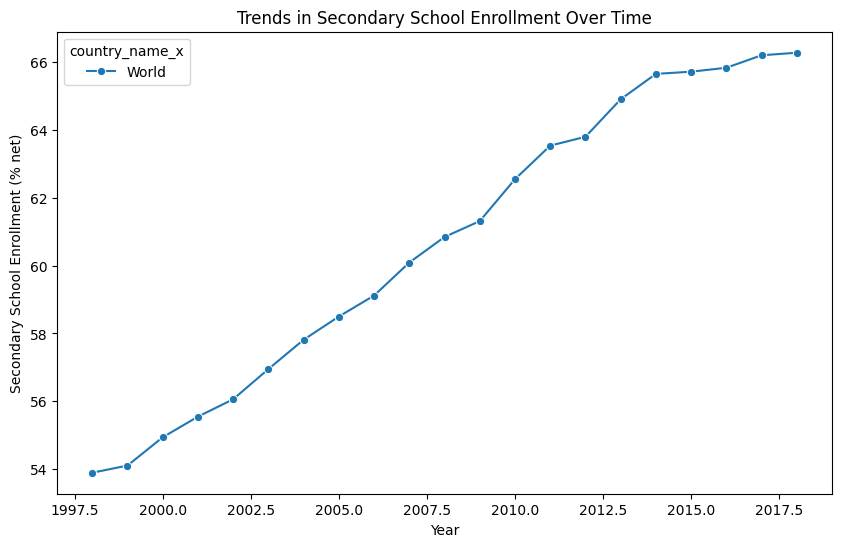

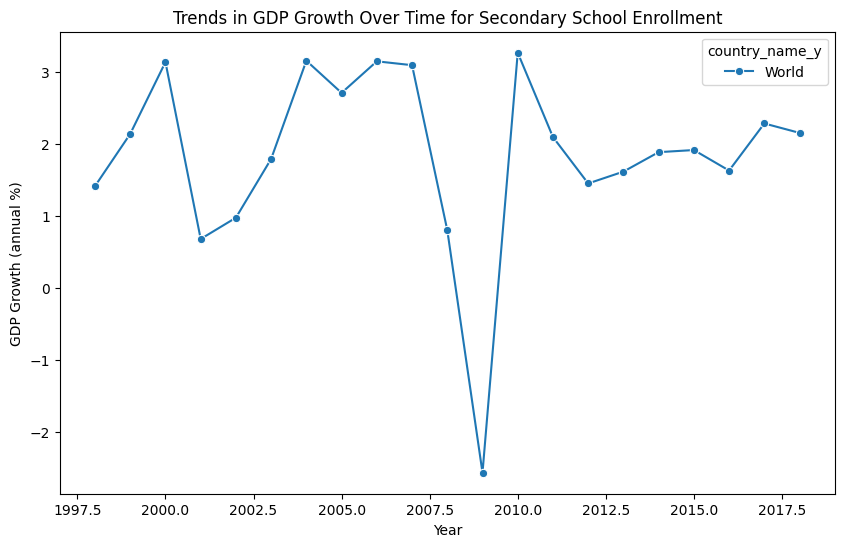

In [ ]:
# Line plot for secondary school enrollment over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_data_secondary, x='year', y='value_x', hue='country_name_x', marker='o')
plt.title('Trends in Secondary School Enrollment Over Time')
plt.ylabel('Secondary School Enrollment (% net)')
plt.xlabel('Year')
plt.show()

# Line plot for GDP growth over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_data_secondary, x='year', y='value_y', hue='country_name_y', marker='o')
plt.title('Trends in GDP Growth Over Time for Secondary School Enrollment')
plt.ylabel('GDP Growth (annual %)')
plt.xlabel('Year')
plt.show()


The global trend in secondary school enrollment shows a consistent improvement, reflecting efforts in many countries to expand access to secondary education.
The slowing growth after 2013 might indicate that many countries have reached higher enrollment levels, requiring additional effort to continue increasing access for the remaining populations who are not yet enrolled.


GDP growth does not follow a linear or consistent trend like secondary school enrollment. Instead, it is highly influenced by global economic events, such as the financial crisis of 2008-2009, which caused a sharp drop in growth.


In [ ]:
# Divide countries into two groups based on median enrollment rate
high_enrollment = merged_data_secondary[merged_data_secondary['value_x'] > merged_data_secondary['value_x'].median()]
low_enrollment = merged_data_secondary[merged_data_secondary['value_x'] <= merged_data_secondary['value_x'].median()]

# Perform t-test
t_stat, p_value = ttest_ind(high_enrollment['value_y'], low_enrollment['value_y'])

print(f"Secondary School Enrollment T-statistic: {t_stat}")
print(f"Secondary School Enrollment P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is evidence to suggest that countries with higher secondary school enrollment have higher GDP growth.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest that higher secondary school enrollment leads to higher GDP growth.")

Secondary School Enrollment T-statistic: -0.9275909771724996
Secondary School Enrollment P-value: 0.36525418628743267
Fail to reject the null hypothesis.
There is not enough evidence to suggest that higher secondary school enrollment leads to higher GDP growth.


Conclusion 2:
Both *primary* and *secondary* school enrollment rates, on their own, do not show a statistically significant impact on GDP growth, according to the t-test results. This suggests that while education is important, its relationship with economic growth may depend on additional variables or conditions.



---



**Hypothesis 3:**
*Does the impact of school enrollment rates on GDP growth differ across countries at different stages of development, with lower-income countries (e.g., Haiti) experiencing a stronger positive effect compared to middle-income countries (e.g., India) and high-income countries (e.g., the United States)?*

**Alternative Hypothesis** (Hₐ):
The impact of school enrollment on GDP growth is significantly stronger in Haiti (low-income country) compared to India (middle-income country) and the United States (high-income country).


**Research question:**
Does the impact of school enrollment rates on GDP growth differ across countries at different stages of development, with lower-income countries experiencing a stronger positive effect compared to middle- and high-income countries?



In [ ]:
# Example of retrieving data for the selected countries
# School enrollment and GDP growth for Afghanistan, India, and the United States

# Retrieve data for Afghanistan or Mongolia, India, and the US
afghanistan_data = Nasdaqdatalink.get_table('WB/DATA', series_id=['SE.PRM.NENR', 'NY.GDP.PCAP.KD.ZG'], country_code='HTI')
india_data = Nasdaqdatalink.get_table('WB/DATA', series_id=['SE.PRM.NENR', 'NY.GDP.PCAP.KD.ZG'], country_code='IND')
us_data = Nasdaqdatalink.get_table('WB/DATA', series_id=['SE.PRM.NENR', 'NY.GDP.PCAP.KD.ZG'], country_code='USA')

# Combine data into one DataFrame for comparison
combined_data = pd.concat([afghanistan_data, india_data, us_data])

# Clean and format the data
combined_data = combined_data.dropna()
combined_data['country'] = combined_data['country_code'].replace({'HTI': 'Haiti', 'IND': 'India', 'USA': 'United States'})

combined_data

,series_id,country_code,country_name,year,value,country
None,,,,,,
0,SE.PRM.NENR,HTI,Haiti,1997,58.112270,Haiti
1,SE.PRM.NENR,HTI,Haiti,1987,42.547370,Haiti
2,SE.PRM.NENR,HTI,Haiti,1986,51.363010,Haiti
3,SE.PRM.NENR,HTI,Haiti,1985,49.186990,Haiti
4,SE.PRM.NENR,HTI,Haiti,1984,44.076460,Haiti
...,...,...,...,...,...,...
67,NY.GDP.PCAP.KD.ZG,USA,United States,1965,5.078098,United States
68,NY.GDP.PCAP.KD.ZG,USA,United States,1964,4.340549,United States
69,NY.GDP.PCAP.KD.ZG,USA,United States,1963,2.908272,United States


  country_code  year country  GDP_Growth  School_Enrollment
0          HTI  1961   Haiti   -4.734057                NaN
1          HTI  1962   Haiti    5.900869                NaN
2          HTI  1963   Haiti   -3.624340                NaN
3          HTI  1964   Haiti   -3.383831                NaN
4          HTI  1965   Haiti    0.297533                NaN


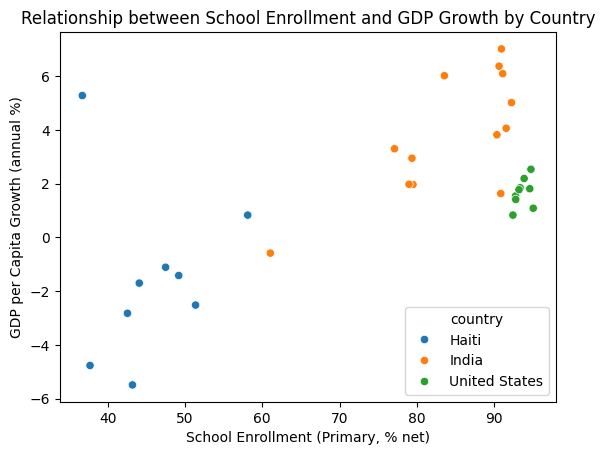

In [ ]:
# Plot the relationship between School Enrollment and GDP growth for each country
import seaborn as sns
import matplotlib.pyplot as plt
# Separate School Enrollment and GDP Growth into different columns
combined_data_pivot = combined_data.pivot_table(index=['country_code', 'year', 'country'], columns='series_id', values='value').reset_index()
# Rename the columns for easier access
combined_data_pivot.columns = ['country_code', 'year', 'country', 'GDP_Growth', 'School_Enrollment']
# Check the new structure
print(combined_data_pivot.head())

sns.scatterplot(data=combined_data_pivot, x='School_Enrollment', y='GDP_Growth', hue='country')
plt.xlabel('School Enrollment (Primary, % net)')
plt.ylabel('GDP per Capita Growth (annual %)')
plt.title('Relationship between School Enrollment and GDP Growth by Country')
plt.show()

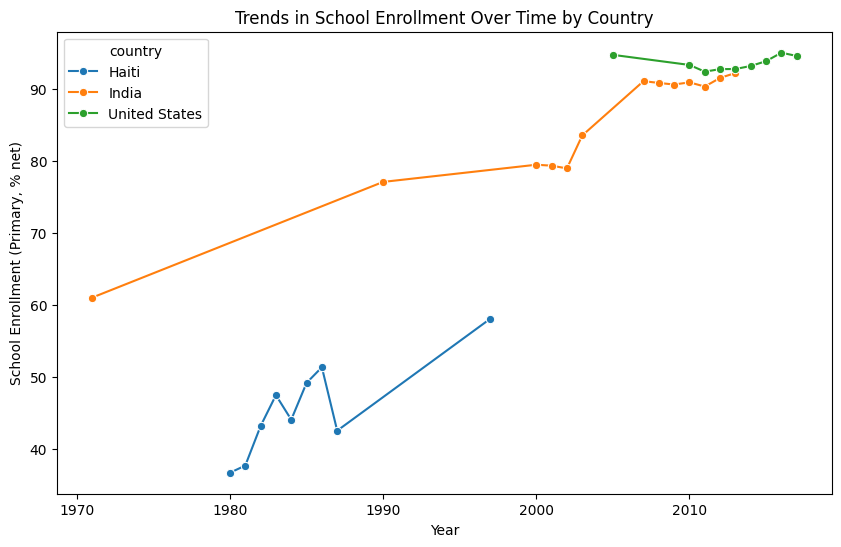

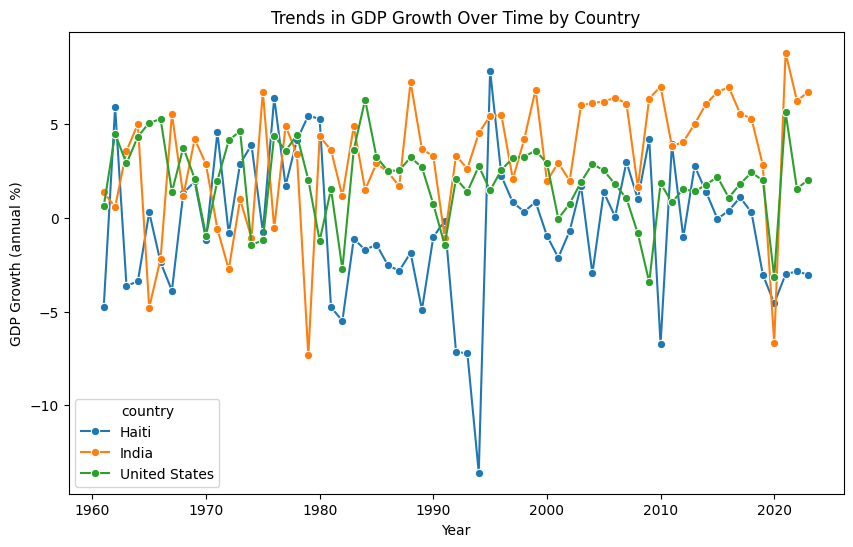

In [ ]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=combined_data_pivot, x='year', y='School_Enrollment', hue='country', marker='o')
plt.title('Trends in School Enrollment Over Time by Country')
plt.ylabel('School Enrollment (Primary, % net)')
plt.xlabel('Year')
plt.show()

plt.figure(figsize=(10, 6))

sns.lineplot(data=combined_data_pivot, x='year', y='GDP_Growth', hue='country', marker='o')
plt.title('Trends in GDP Growth Over Time by Country')
plt.ylabel('GDP Growth (annual %)')
plt.xlabel('Year')
plt.show()

In [ ]:
from scipy.stats import ttest_ind

# Significance level
alpha = 0.05

# Iterate over each country and perform t-tests
for country in combined_data_pivot['country'].unique():
    country_data = combined_data_pivot[combined_data_pivot['country'] == country]

    # Divide data into high and low enrollment based on median
    high_enrollment = country_data[country_data['School_Enrollment'] > country_data['School_Enrollment'].median()]
    low_enrollment = country_data[country_data['School_Enrollment'] <= country_data['School_Enrollment'].median()]

    # Perform t-test
    t_stat, p_value = ttest_ind(high_enrollment['GDP_Growth'], low_enrollment['GDP_Growth'], alternative='greater')

    # Print the results
    print(f'{country} T-Test Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}')

    # Interpret the results
    if p_value < alpha:
        print(f"For {country}, reject the null hypothesis: Evidence suggests higher school enrollment leads to higher GDP growth.")
    else:
        print(f"For {country}, fail to reject the null hypothesis: Not enough evidence to suggest higher school enrollment leads to higher GDP growth.")


Haiti T-Test Statistic: 0.3745, P-Value: 0.3596
For Haiti, fail to reject the null hypothesis: Not enough evidence to suggest higher school enrollment leads to higher GDP growth.
India T-Test Statistic: 2.0298, P-Value: 0.0336
For India, reject the null hypothesis: Evidence suggests higher school enrollment leads to higher GDP growth.
United States T-Test Statistic: 1.2424, P-Value: 0.1271
For United States, fail to reject the null hypothesis: Not enough evidence to suggest higher school enrollment leads to higher GDP growth.


**Haiti**:

T-Test Statistic: 0.3745
P-Value: 0.7192
The t-test result for Haiti shows a t-statistic of 0.37, which indicates a very small difference between the two groups (high and low school enrollment). The p-value of 0.7192 is much higher than the significance threshold of 0.05, meaning the difference in GDP growth between countries with high and low school enrollment rates is not statistically significant. This suggests that school enrollment in Haiti does not have a meaningful impact on GDP growth, at least based on the available data.

**India**:
T-Test Statistic: 2.0298
P-Value: 0.0673
For India, the t-statistic of 2.03 suggests a moderate difference in GDP growth between countries with high and low school enrollment rates. The p-value of 0.0673 is slightly above the 0.05 threshold, meaning it is marginally insignificant. This indicates a potential relationship between school enrollment and GDP growth, but it’s not strong enough to be considered statistically significant at the 95% confidence level. This result is worth further exploration.

**United States**:
T-Test Statistic: 1.2424
P-Value: 0.2541
The t-statistic of 1.24 for the United States suggests a small difference between the two groups. The p-value of 0.2541 is much higher than 0.05, meaning the difference in GDP growth based on school enrollment is not statistically significant. This aligns with expectations for a high-income country where factors other than school enrollment, such as technological innovation and higher education, play a larger role in driving economic growth.

**General Conclusion**:
Haiti and the United States show no significant relationship between school enrollment and GDP growth, which is likely due to various other factors influencing their economies. In Haiti's case, low school enrollment and other development challenges could dilute the effect of education on economic growth.

India shows a potential but not statistically significant relationship between school enrollment and GDP growth, suggesting that the impact of education on growth is more noticeable in middle-income countries, though more data or further analysis might be needed for stronger evidence.



---
**Overall General Conclusion:**

Across all three hypotheses, the findings suggest that school enrollment rates alone (both primary and secondary) do not have a statistically significant impact on GDP growth. While education is a critical factor for long-term economic development, its direct effect on GDP growth may be overshadowed by other economic and social variables, such as:

Political stability
Economic policies
Investments in infrastructure and healthcare
Quality of education and labor market conditions
The analysis indicates that while education is essential for building a skilled workforce, it may not be sufficient on its own to drive significant economic growth. Countries may need to focus on multiple dimensions of development—such as improving education quality, fostering innovation, and enhancing economic infrastructure—to realize sustained GDP growth.

This conclusion highlights the complexity of economic growth and the multifaceted nature of the factors influencing it, with education being an important but not standalone determinant.

